In [1]:
#Connection aux API et à la bdd neo4j
print('Connection aux API et à la bdd neo4j')
%run ../authentification.ipynb

#Importation librairies plotly
import plotly.plotly as py
import plotly.graph_objs as go

#Importation librairies pandas
from pandas import DataFrame
import pandas as pd
import pandas_datareader.data as web

#Importation librairies matplotlib
import matplotlib.pyplot as plt

#Importation librairies textblob
from textblob import TextBlob

#Autres
import re
from datetime import datetime


import operator 
import json
from collections import Counter
import re
import nltk
#######  TRES IMPORTANT: decommenter la ligne ci dessous et download corpora nltk ############
#qui permet de excluire les corpus spécifiques (to, no, yes etc.)
#nltk.download('stopwords')
from nltk.corpus import stopwords
import string


Connection aux API et à la bdd neo4j
Authentification à l"api réussie
Connexion à neo4j réussie
Connexion à l"api plotly


In [2]:
#Methode de Sentiment Analysis
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    return analysis.sentiment.polarity*10



numbers=[]

i=0
while i <= 2018: # Tant que i est strictement inférieure à 10
    numbers.append(str(i))
    i += 1
#Methodes pour le comptage des occurences des mots

punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via','us','trump','realdonaldtrump','httpstco','i','ha','the','amp','mr','dont','youre','u'] +list(numbers)

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)

def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens



In [3]:
pd.set_option('display.max_colwidth', -1)
qloc="MATCH (n:Tweet)<-[r:POSTED]-(u:User) where u.screen_name='realDonaldTrump' RETURN lower(n.text),toInt(n.retweet_count),n.tid"
results=sgraph.run(qloc)

data = pd.DataFrame(data=[(len(tweet[0]),tweet[2],tweet[1],tweet[0]) for tweet in results], columns=['length','id','retweet','Tweets'])

#display(data.sort_values('retweet', ascending=False ).head(50))
TweetTexts=data['Tweets']
    
TweetTexts = np.array([ clean_tweet(str(tweet)) for tweet in TweetTexts ])    
data['SA'] = np.array([ analize_sentiment(str(tweet)) for tweet in TweetTexts ])



In [4]:

%%HTML
<h1> Sentiment Analysis des tweets postés par Trump</h1>
<h3 style="color:purple;" >1) les 50 tweets le plus positifs classés par nombre de retweet </h3>

In [9]:
datagraphe1=data.sort_values(['SA', 'retweet'], ascending=[False, False])
display(datagraphe1.head(50))

,length,id,retweet,Tweets,SA
1229,140,912848241535971331,41803,even usain bolt from jamaica one of the greatest runners and athletes of all time showed respect for our national anthem httpstcozkenuap9rs,10.000000
839,139,896504109670567936,25235,deepest condolences to the families amp fellow officers of the va state police who died today youre all among the best this nation produces,10.000000
1631,97,927059219370643456,22277,playing golf with prime minister abe and hideki matsuyama two wonderful people httpstcovylule0o2k,10.000000
782,133,894368024765059073,19316,just completed call with president moon of south korea very happy and impressed with 150 united nations vote on north korea sanctions,10.000000
943,132,901044579750825985,14951,nick adams retaking america best things of this presidency arent reported about convinced this will be perhaps best presidency ever,10.000000
2099,132,951645893513613312,14898,thank you adam levine the federalist in interview on foxandfriends donald trump is the greatest president our country has ever seen,10.000000
1321,135,915890389269254145,14566,so wonderful to be in las vegas yesterday and meet with people from police to doctors to the victims themselves who i will never forget,10.000000
20,136,850489084221018113,14516,rt ivankatrump very proud of arabella and joseph for their performance in honor of president xi jinping and madame peng liyuans official,10.000000
2258,169,961362249880252416,12897,congratulations to the republic of korea on what will be a magnificent winter olympics what the south korean people have built is truly an inspiration httpstcogin2b1h6ph,10.000000
3090,65,1003612459855466497,12337,this is the best time ever to look for a job james freeman of wsj,10.000000


In [5]:
%%HTML

<h3 style="color:purple;" >2) les 50 tweets le plus négatifs classés par nombre de retweet  </h3>

In [10]:
datagraphe2=data.sort_values(['SA', 'retweet'], ascending=[True, False])
display(datagraphe2.head(50))

,length,id,retweet,Tweets,SA
1298,114,914810093874671617,71294,my warmest condolences and sympathies to the victims and families of the terrible las vegas shooting god bless you,-10.000000
3041,271,1001848460881035265,45477,bob iger of abc called valerie jarrett to let her know that abc does not tolerate comments like those made by roseanne barr gee he never called president donald j trump to apologize for the horrible statements made and said about me on abc maybe i just didnt get the call,-10.000000
528,138,882558219285131265,25260,the united states made some of the worst trade deals in world historywhy should we continue these deals with countries that do not help us,-10.000000
2707,169,986576502358671361,22351,slippery james comey the worst fbi director in history was not fired because of the phony russia investigation where by the way there was no collusion except by the dems,-10.000000
351,148,874309930232184833,21303,we will never forget the victims who lost their lives one year ago today in the horrific pulsenightclub shooting orlandounitedday httpstcooffuvafbjm,-10.000000
2290,117,963879275324760070,18915,just spoke to governor rick scott we are working closely with law enforcement on the terrible florida school shooting,-10.000000
2607,148,982673223719489536,17699,just spoke to justintrudeau to pay my highest respect and condolences to the families of the terrible humboldt team tragedy may god be with them all,-10.000000
1099,112,908796281002307584,14024,our hearts amp prayers go out to the people of london who suffered a vicious terrorist attack httpstcoq2htbv2l5t,-10.000000
1284,133,914217658517737472,13221,we must all be united in offering assistance to everyone suffering in puerto rico and elsewhere in the wake of this terrible disaster,-10.000000
1648,65,927851452185407490,6766,and has been horrible on virginia economy vote edwgillespie today,-10.000000


In [7]:
%%HTML

<h3 style="color:purple;" >3) Répartition des sentiments des tweets postés par Trump </h3>

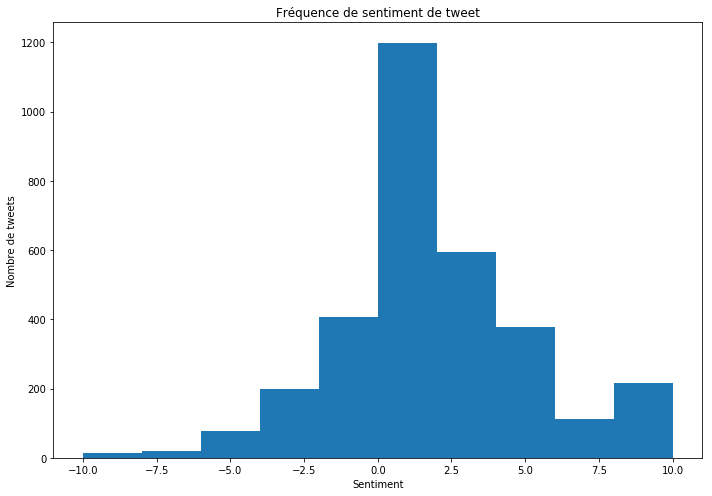

In [11]:
dt = datagraphe1['SA']
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Fréquence de sentiment de tweet")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Nombre de tweets")
mean = np.mean(dt)
ax.hist(dt)
fig.tight_layout()
plt.show()

In [11]:
%%HTML
<h3 style="color:purple;" >4) Analyse du nombre d'occurences de mots dans les tweets postés par Trump
</h3>

In [12]:

count_all = Counter()
for line in TweetTexts:
    
        # Create a list with all the terms
    terms_all = [term for term in preprocess(line) if term not in stop]
    #terms_all = [term for term in preprocess(line)]
        # Update the counter
    count_all.update(terms_all)
    # Print the first 5 most frequent words
#print(count_all.most_common(50))

occurrence = pd.DataFrame(data=count_all.most_common(50), columns=['mots','occurrence'])
display(occurrence)


,mots,occurrence
0,great,714
1,people,324
2,news,258
3,president,249
4,big,218
5,country,218
6,fake,216
7,thank,215
8,today,215
9,many,203


In [13]:
%%HTML
<h1> Sentiment Analysis des commentaires des tweets de Trump:</h1>
<h3 style="color:purple;" >1) Analyse du sentiment des tweets de Trump, classé par nombre de commentaires </h3>

In [13]:
req="MATCH (t1:Tweet)-[r:REPLYTO]->(t2:Tweet)  with t2.tid as id,left(t2.date,16)as date,t2.text as txt, count(t1) as cnt where NOT ((t2.tid= '882558219285131265') OR(t2.tid= '1003738744061603843')OR(t2.tid= '912848241535971331')  ) return id,date,txt,cnt order by cnt desc limit 10"


reqs=sgraph.run(req)

data = pd.DataFrame(data=[(tweet[0],tweet[1],tweet[2],tweet[3]) for tweet in reqs], columns=['id','date','Tweets','Nombre'])


#display(data.sort_values('retweet', ascending=False ).head(50))
TweetTextsreq=data['Tweets']
    
TweetTextsreq = np.array([ clean_tweet(str(tweet)) for tweet in TweetTextsreq ])    
data['SA'] = np.array([ analize_sentiment(str(tweet)) for tweet in TweetTextsreq ])
datagraphereq=data

display(datagraphereq)


,id,date,Tweets,Nombre,SA
0,1007278788009480192,2018-06-14 15:09,The sleazy New York Democrats and their now disgraced and run out of town AG Eric Schneiderman are doing everything they can to sue me on a foundation that took in 18800000 and gave out to charity more money than it took in 19200000 I wont settle this case,445,3.181818
1,1007278701996802048,2018-06-14 15:08,So the Democrats make up a phony crime Collusion with the Russians pay a fortune to make the crime sound real illegally leak Comey classified information so that a Special Councel will be appointed and then Collude to make this pile of garbage take on life in Fake News,370,-1.232143
2,1007315424546091008,2018-06-14 17:34,Happy FlagDay httpstcoKEUMfnoHIv,315,8.000000
3,1007278825661784064,2018-06-14 15:09,Schneiderman who ran the Clinton campaign in New York never had the guts to bring this ridiculous case which lingered in their office for almost 2 years Now he resigned his office in disgrace and his disciples brought it when we would not settle,170,-0.984848
4,1007278671097417729,2018-06-14 15:08,Now that I am back from Singapore where we had a great result with respect to North Korea the thought process must sadly go back to the Witch Hunt always remembering that there was No Collusion and No Obstruction of the fabricated No Crime,146,2.000000
5,1007300111481888768,2018-06-14 16:33,Happy 243rd Birthday to the USArmy Thank you for your bravery sacrifices and dedication to the USA We love you httpstcoXlQYstu3Vo,97,6.500000
6,1007239837529800705,2018-06-14 12:34,The Republican Party is starting to show very big numbers People are starting to see what is being done Results are speaking loudly North Korea and our greatest ever economy are leading the way,68,2.200000
7,1006891643985854464,2018-06-13 13:30,So funny to watch the Fake News especially NBC and CNN They are fighting hard to downplay the deal with North Korea 500 days ago they would have begged for this deallooked like war would break out Our Countrys biggest enemy is the Fake News so easily promulgated by fools,63,-1.013889
8,1006992524366503941,2018-06-13 20:11,Senator Claire McCaskill of the GREAT State of Missouri flew around in a luxurious private jet during her RV tour of the state RVs are not for her People are really upset so phony Josh Hawley should win big and has my full endorsement,31,3.583333
9,1006833565022031873,2018-06-13 09:40,Robert De Niro a very Low IQ individual has received too many shots to the head by real boxers in movies I watched him last night and truly believe he may be punchdrunk I guess he doesnt,25,1.400000


In [24]:
%%HTML
<h3 style="color:purple;" >2)Analyse des occurences de mots pour le commentaire suivant:</h3>
<p>"Happy FlagDay"</p> 


In [16]:
req2="MATCH (t1:Tweet)-[r:REPLYTO]->(t2:Tweet) where t2.tid='1007315424546091008' RETURN lower(t1.text),toInt(t1.retweet_count),t1.tid"
reqs2=sgraph.run(req2)

data = pd.DataFrame(data=[(tweet[2],tweet[0]) for tweet in reqs2], columns=['id','Tweets'])

TweetTextsreq2=data['Tweets']
    
TweetTextsreq2 = np.array([ clean_tweet(str(tweet)) for tweet in TweetTextsreq2 ])    
data['SA'] = np.array([ analize_sentiment(str(tweet)) for tweet in TweetTextsreq2 ])
datagraphereq2=data

# display(datagraphereq2)

In [17]:
count_all = Counter()
for line in TweetTextsreq2:
    terms_all = [term for term in preprocess(line) if term not in stop]
    count_all.update(terms_all)

occurrence = pd.DataFrame(data=count_all.most_common(10), columns=['mots','occurrence'])
display(occurrence)

,mots,occurrence
0,happy,92
1,birthday,77
2,flag,69
3,president,56
4,day,39
5,children,33
6,god,24
7,america,20
8,country,20
9,people,16


In [23]:
%%HTML

<h3 style="color:purple;" >3) Analyse des occurences de mots pour le commentaire suivant:</h3>
    <p>"So the Democrats make up a phony crime Collusion with the Russians pay a fortune to make the crime sound real illegally leak Comey classified information so that a Special Councel will be appointed and then Collude to make this pile of garbage take on life in Fake News"</p>
 

In [18]:
   
req1="MATCH (t1:Tweet)-[r:REPLYTO]->(t2:Tweet) where t2.tid='1007278701996802048' RETURN lower(t1.text),toInt(t1.retweet_count),t1.tid"
reqs1=sgraph.run(req1)

data = pd.DataFrame(data=[(tweet[2],tweet[0]) for tweet in reqs1], columns=['id','Tweets'])

TweetTextsreq1=data['Tweets']
    
TweetTextsreq1 = np.array([ clean_tweet(str(tweet)) for tweet in TweetTextsreq1 ])    
data['SA'] = np.array([ analize_sentiment(str(tweet)) for tweet in TweetTextsreq1 ])
datagraphereq1=data

# display(datagraphereq1)



In [13]:
count_all = Counter()
for line in TweetTextsreq1:
    terms_all = [term for term in preprocess(line) if term not in stop]
    count_all.update(terms_all)

occurrence = pd.DataFrame(data=count_all.most_common(10), columns=['mots','occurrence'])
display(occurrence)

,mots,occurrence
0,president,42
1,people,34
2,fake,26
3,like,22
4,keep,22
5,see,21
6,counsel,20
7,know,20
8,jail,19
9,get,19


In [21]:
%%HTML
<h3 style="color:purple;" >4) Comparaîson pour les deux commentaires</h3>

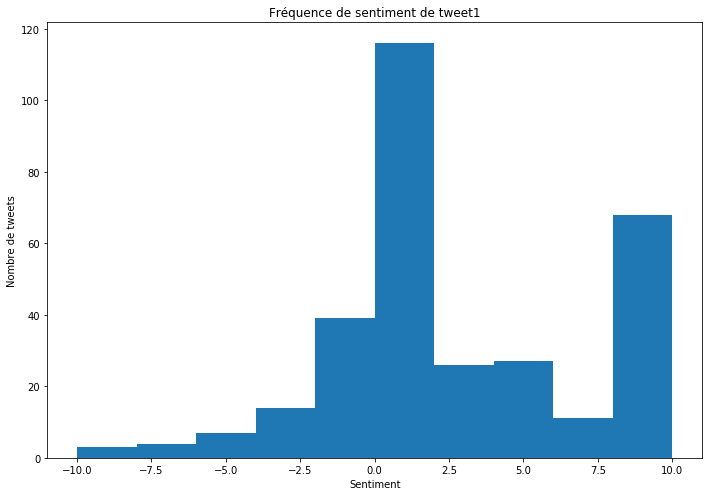

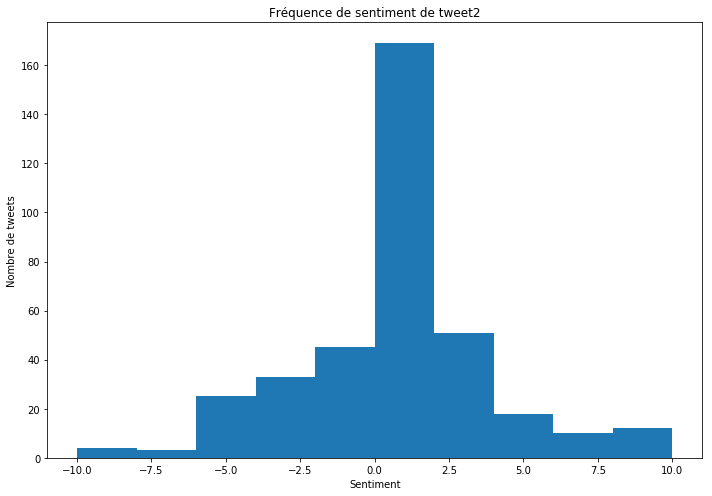

In [19]:
dt = datagraphereq2['SA']
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Fréquence de sentiment de tweet1")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Nombre de tweets")
mean = np.mean(dt)
ax.hist(dt)
fig.tight_layout()
plt.show()

dt = datagraphereq1['SA']
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Fréquence de sentiment de tweet2")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Nombre de tweets")
mean = np.mean(dt)
ax.hist(dt)
fig.tight_layout()
plt.show()

